In [1]:
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SequentialFeatureSelector as sfs
import joblib
import tensorflow as tf
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from tensorflow.keras.optimizers import Adam,RMSprop
from keras.callbacks import EarlyStopping 
import warnings
warnings.filterwarnings("ignore")


<h2>1. Reading the DataSet obtained after EDA</h2>

In [2]:
df = pd.read_csv('Final Dataset/battery.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,CC_Duration_Charge,Overall_Grad_Vol,Max_Temp_Time_Charge,Max_Temp_Time_Discharge,Min_Volt_Time_Discharge,Capacity
0,733.297,0.000448,2005.797,3366.781,3346.937,1.856487
1,3336.391,0.000451,3447.609,3348.735,3328.828,1.846327
2,3345.234,0.000453,3419.156,3329.281,3309.422,1.835349
3,3323.656,0.000453,3421.593,3329.500,3309.719,1.835263
4,3322.359,0.000453,3395.125,3327.531,3307.688,1.834646


<h2>2. Checking the Correlation among the feature</h2>

In [3]:
#Getting the correlation among the features
df_corr = df.corr(method ='pearson')

<h3>2.1. Plotting the correlation in a heatmap</h3>

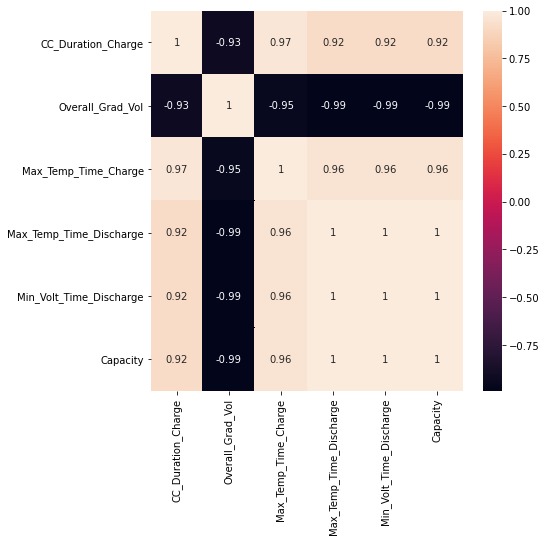

In [4]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
hm = sn.heatmap(data = df_corr,annot=True)  
# displaying the plotted heatmap
plt.show()

In [5]:
#So let us take only the positively correlated features
df.drop(columns=['Overall_Grad_Vol'],inplace=True)
df.head()

,CC_Duration_Charge,Max_Temp_Time_Charge,Max_Temp_Time_Discharge,Min_Volt_Time_Discharge,Capacity
0,733.297,2005.797,3366.781,3346.937,1.856487
1,3336.391,3447.609,3348.735,3328.828,1.846327
2,3345.234,3419.156,3329.281,3309.422,1.835349
3,3323.656,3421.593,3329.500,3309.719,1.835263
4,3322.359,3395.125,3327.531,3307.688,1.834646


In [6]:
#Taking out the target variable
var = df['Capacity']
df = df.drop(columns=['Capacity'])
df.head()

,CC_Duration_Charge,Max_Temp_Time_Charge,Max_Temp_Time_Discharge,Min_Volt_Time_Discharge
0,733.297,2005.797,3366.781,3346.937
1,3336.391,3447.609,3348.735,3328.828
2,3345.234,3419.156,3329.281,3309.422
3,3323.656,3421.593,3329.500,3309.719
4,3322.359,3395.125,3327.531,3307.688


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CC_Duration_Charge       633 non-null    float64
 1   Max_Temp_Time_Charge     633 non-null    float64
 2   Max_Temp_Time_Discharge  633 non-null    float64
 3   Min_Volt_Time_Discharge  633 non-null    float64
dtypes: float64(4)
memory usage: 19.9 KB


<h2>3. Splitting the Dataset into Train and Test in the ratio 3:1</h2>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df, var, test_size=0.25, random_state=42)

<h2>4. Doing the Min-Max Scaling</h2>

In [9]:
minmaxScaler = MinMaxScaler()
minmaxScaler.fit(X_train)
X_train_min_max = minmaxScaler.transform(X_train)
X_test_min_max = minmaxScaler.transform(X_test)

y = minmaxScaler.transform(([[1,2,3,4]]))
print(y)

[[-0.22160229 -1.05484582 -1.35858141 -1.31930358]]


In [10]:
df_min_max = pd.DataFrame(X_train_min_max,columns=['CC_Duration_Charge','Max_Temp_Time_Charge','Max_Temp_Time_Discharge','Min_Volt_Time_Discharge',])
df_min_max.head()

,CC_Duration_Charge,Max_Temp_Time_Charge,Max_Temp_Time_Discharge,Min_Volt_Time_Discharge
0,0.513526,0.224755,0.329135,0.332628
1,0.170570,0.002697,0.066234,0.071433
2,0.835705,0.730553,0.786193,0.789329
3,0.695509,0.493080,0.580053,0.573015
4,0.676173,0.459523,0.555925,0.536972


In [11]:
df_min_max.describe()

,CC_Duration_Charge,Max_Temp_Time_Charge,Max_Temp_Time_Discharge,Min_Volt_Time_Discharge
count,474.000000,474.000000,474.000000,474.000000
mean,0.596005,0.392437,0.489186,0.487139
std,0.213442,0.271765,0.229041,0.227895
min,0.000000,0.000000,0.000000,0.000000
25%,0.450019,0.166090,0.306445,0.306933
50%,0.582930,0.355321,0.469981,0.458920
75%,0.779969,0.637087,0.686119,0.687266
max,1.000000,1.000000,1.000000,1.000000


<h2>5. Modelling</h2>

<h2>1 Base Model</h2>

Here base model is a model which predicts all values to be the mean of all the capacity values in the training set.
And I expect any sensible model to have a better performance than the base model otherwise the model would be reckoned as a 
dumb model and rejected.

In [12]:
#This model predicts the output as the mean of the target variable
y_mean = np.mean(y_train)

y_pred_train = np.full(len(y_train), y_mean)
mse_train_min_max = mean_squared_error(y_train,y_pred_train)
mae_train_min_max = mean_absolute_error(y_train,y_pred_train)
print("Train MSE base::",mse_train_min_max)
print("Train MAE base::",mae_train_min_max)


y_pred_test = np.full(len(y_test), y_mean)
mse_test_min_max = mean_squared_error(y_test,y_pred_test)
mae_test_min_max = mean_absolute_error(y_test,y_pred_test)
print("Test MSE base::",mse_test_min_max)
print("Test MAE base::",mae_test_min_max)

Train MSE base:: 0.0391498898127268
Train MAE base:: 0.17021291971656374
Test MSE base:: 0.04100077583406158
Test MAE base:: 0.17816648447424682


Here the MAE of the base model for test data is 0.17 and for any sensible model MAE will have to be lower than 0.17

<h2>2. Linear Regression</h2>

In [13]:
l_reg = LinearRegression()
l_reg.fit(X_train_min_max,y_train)


y_train_min_max_hat = l_reg.predict(X_train_min_max)
mse_train_min_max = mean_squared_error(y_train,y_train_min_max_hat)
mae_train_min_max = mean_absolute_error(y_train,y_train_min_max_hat)
print("Train MSE ::",mse_train_min_max)
print("Train MAE ::",mae_train_min_max)

y_test_min_max_hat = l_reg.predict(X_test_min_max)
mse_test_min_max = mean_squared_error(y_test,y_test_min_max_hat)
mae_test_min_max = mean_absolute_error(y_test,y_test_min_max_hat)
print("Test MSE ::",mse_test_min_max)
print("Test MAE ::",mae_test_min_max)

Train MSE :: 2.219939777679273e-05
Train MAE :: 0.0035456016054010954
Test MSE :: 2.766410753351947e-05
Test MAE :: 0.003919673034094288


In [14]:
y_pred = l_reg.predict(np.array([[-0.22160229, -1.05484582 ,-1.35858141 ,-1.31930358]]))
print(y_pred)

[0.03053752]


<h3>2.1 Plotting a curve between actual and predicted Test datapoints</h3>

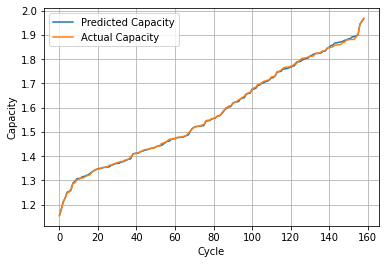

In [83]:
y_test_hat_sort = np.sort(y_test_min_max_hat)
y_test_sort = np.sort(y_test)
plt.grid()
plt.plot(y_test_hat_sort,label='Predicted Capacity')
plt.plot(y_test_sort,label='Actual Capacity')
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.legend()
plt.show()

<h3>2.2 Checking for Heteroskedasticity</h3>

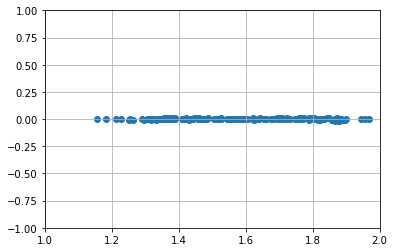

In [84]:
y_pred = y_test_min_max_hat
y_true = y_test.values
y_diff = y_true - y_pred
plt.grid()
plt.xlim(1, 2)
plt.ylim(-1, 1)
plt.scatter(y_pred,y_diff)
plt.show()

<h3>2.3 Distribution of Error</h3>

Mean of error:: 0.0006117541923667469
Std of error:: 0.0052239701704394495


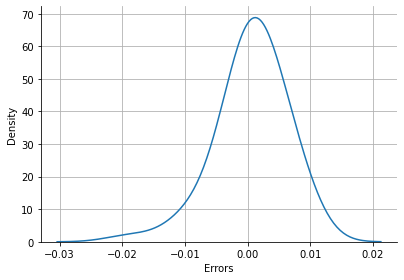

In [85]:
print("Mean of error::",np.mean(y_diff))
print("Std of error::",np.std(y_diff))
df_error = pd.DataFrame(y_diff)
df_error.rename(columns={0:"Errors"},inplace=True) 
sns.displot(df_error, x='Errors', kind="kde", bw_adjust=2,height=4, aspect=10/7)
plt.grid()
plt.show()

<h3>2.4 Perturbation test to check for multicollinearity</h3>

In [86]:
#Perturbation test to check for collinearity
coeff_normal = reg.coef_
print("The original coefficients are::          ",coeff_normal)

X_noise = np.random.normal(loc=0, scale=0.01, size=X_train_min_max.shape)
X_train_min_max += X_noise
reg = LinearRegression()
reg.fit(X_train_min_max,y_train)
coeff_per = reg.coef_
print("The coefficients after perturbation are::",coeff_per)

coeff_diff = coeff_normal - coeff_per
print("The difference in the coeffs are::       ",coeff_diff)
#We can see that the change in weights are not significant, hence there is no multi-collinearity issues

The original coefficients are::           [-0.01265618  0.00899271 -0.60260132  1.47421043]
The coefficients after perturbation are:: [-0.03285199  0.03595663  0.08627469  0.76595507]
The difference in the coeffs are::        [ 0.0201958  -0.02696393 -0.688876    0.70825536]


<h3>2.5 Getting the feature importance</h3>

In [88]:
#Getting the feature importance:
arg_sort = np.argsort(coeff_normal)
col_arr = df.columns[arg_sort]
print(" The importance of the features in decreasing order is::",'\n',np.array(np.flip(col_arr)))

 The importance of the features in decreasing order is:: 
 ['Min_Volt_Time_Discharge' 'Max_Temp_Time_Charge' 'CC_Duration_Charge'
 'Max_Temp_Time_Discharge']


<h3>2.6 Observations from the model performance</h3>

1. From the model prediction the MAE is less than that of the base model, hence the model is sensible. 
2. From the actual and predicted Test datapoints curve, we see that the predicted values almost follows the actual values
3. From the Heteroskedasticity plot, the curve is not funnelling out hence there is no Heteroskedasticity in the model. Hence      the population in the regression problem does not contain unequal variance and thus the prediction of the model can be          accepted. 
4. The Error is centred about 0.00061 with a standard deviation of 0.005 
5. The variation in the coeffecients due to pertubation test is very small hence there is no problem of multi-collinearity
6. The most important feature given by the model is Min_Volt_Time_Discharge which is the duration after which the discharge voltage reached 2.7 volts. It is seen that the time required to reach a voltage of 2.7 volts during discharge decreases as the number of discharge cycles increases and this characteristic is in consonance with the bahaiviour of the capacity of the battery. 

<h2>3. Support Vector Regression</h2>

Best value of epsilon during CV:: 0.001
Best MSE score during CV:: -0.009633723217483705


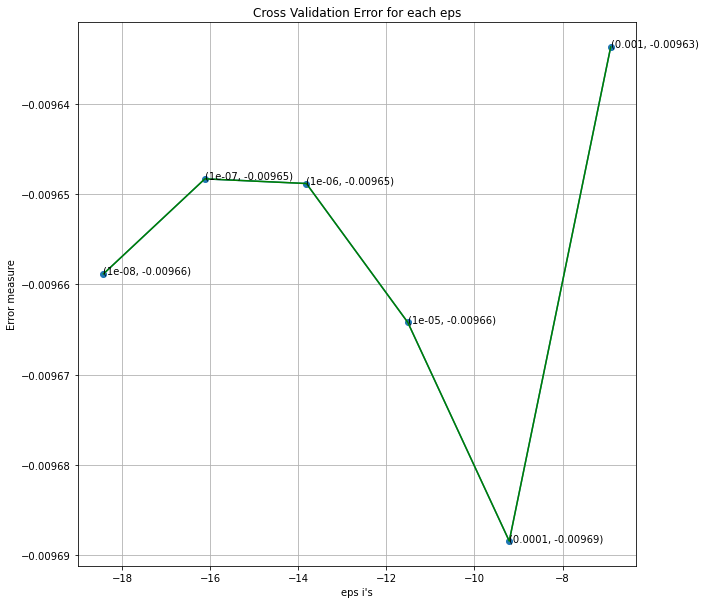

Train MSE Min-Max:: 0.00013872583188516703
Train MAE Min-Max:: 0.009459596662359201
Test MSE Min-Max:: 6.560979984581031e-05
Test MAE Min-Max:: 0.006509108512317755


In [68]:
regressor = SVR()
params = [{'kernel':['linear'],'epsilon' : [0.001,0.0001,0.00001,0.000001,0.0000001,0.00000001]}]
reg = GridSearchCV(regressor, params, cv = 10, scoring='neg_mean_absolute_error')
reg.fit(X_train_min_max, y_train)
best_epsilon = reg.best_params_['epsilon']
print("Best value of epsilon during CV::",best_epsilon)
print("Best MSE score during CV::",reg.best_score_)

###################################
eps = [i['epsilon'] for i in reg.cv_results_['params']]
cv_error = [i for i in reg.cv_results_['mean_test_score']]
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(np.log(eps), cv_error,marker='o')
ax.plot(np.log(eps), cv_error,c='g')
for i, txt in enumerate(np.round(cv_error,5)):
    ax.annotate((np.round((eps)[i],10),txt), (np.log(eps)[i],(cv_error[i])))
plt.grid()
plt.title("Cross Validation Error for each eps")
plt.xlabel("eps i's")
plt.ylabel("Error measure")
plt.show()
###################################



reg = SVR(kernel='linear',epsilon=best_epsilon)
reg.fit(X_train_min_max,y_train)

y_train_min_max_hat = reg.predict(X_train_min_max)
mse_train_min_max = mean_squared_error(y_train,y_train_min_max_hat)
mae_train_min_max = mean_absolute_error(y_train,y_train_min_max_hat)
print("Train MSE Min-Max::",mse_train_min_max)
print("Train MAE Min-Max::",mae_train_min_max)

y_test_min_max_hat = reg.predict(X_test_min_max)
mse_test_min_max = mean_squared_error(y_test,y_test_min_max_hat)
mae_test_min_max = mean_absolute_error(y_test,y_test_min_max_hat)
print("Test MSE Min-Max::",mse_test_min_max)
print("Test MAE Min-Max::",mae_test_min_max)


<h3>3.1 Plotting a curve between actual and predicted Test datapoints</h3>

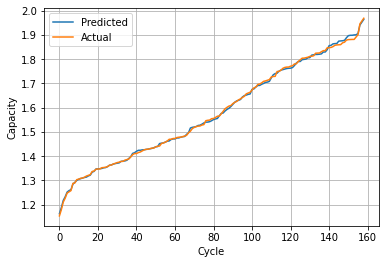

In [50]:
y_test_min_max_hat_sort = np.sort(y_test_min_max_hat)
y_test_sort = np.sort(y_test)
plt.grid()
plt.plot(y_test_min_max_hat_sort,label='Predicted')
plt.plot(y_test_sort,label='Actual')
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.legend()

plt.show()

<h3>3.2 Checking for Heteroskedacity</h3>

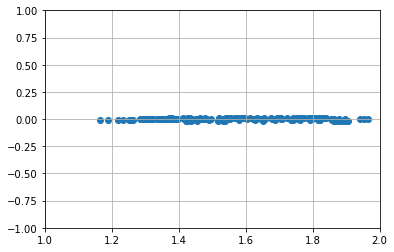

In [51]:
y_pred = y_test_min_max_hat
y_true = y_test.values
y_diff = y_true - y_pred
plt.grid()
plt.xlim(1, 2)
plt.ylim(-1, 1)
plt.scatter(y_pred,y_diff)
plt.show()
#No heterosckedacity 

<h3>3.3 Distribution of error</h3>

Mean of error:: -1.0217626316516117e-05
Std of error:: 0.008099981200343788


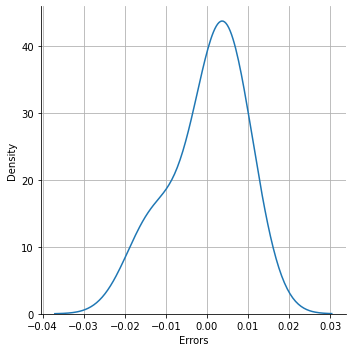

In [52]:

print("Mean of error::",np.mean(y_diff))
print("Std of error::",np.std(y_diff))
df_error = pd.DataFrame(y_diff)
df_error.rename(columns={0:"Errors"},inplace=True) 
sns.displot(df_error, x='Errors', kind="kde", bw_adjust=2)
plt.grid()
plt.show()

<h3>3.4 Most important feature</h3>

In [53]:
sfs_svm = sfs(reg, n_features_to_select=1, direction='forward', scoring='neg_mean_squared_error')
sfs_svm = sfs_svm.fit(X_train_min_max, y_train)
feature_indices = sfs_svm.get_support()
print("The most important feature is::",df.columns[feature_indices][0])

The most important feature is:: Min_Volt_Time_Discharge


<h3>3.5 Observations from the model performance</h3>

1. From the model prediction the MAE is less than that of the base model, hence the model is sensible. 
2. From the actual and predicted Test datapoints curve, we see that the predicted values almost follows the actual values but      with slight variation towards the end 
3. From the Heteroskedasticity plot, the curve is not funnelling out hence there is no Heteroskedasticity in the model. Hence      the population in the regression problem does not contain unequal variance and thus the prediction of the model can be          accepted. 
4. The Error is centred about -1.02e-05 with a standard deviation of 0.008 
5. The most important feature given by the model is Min_Volt_Time_Discharge which is the duration after which the discharge voltage reached 2.7 volts. It is seen that the time required to reach a voltage of 2.7 volts during discharge decreases as the number of discharge cycles increases and this characteristic is in consonance with the bahaiviour of the capacity of the battery.

<h2>4. K-Nearest Regression</h2>

Best value of n_neighbors during CV:: 3
Best MSE score during CV:: -0.01122294954683464
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]


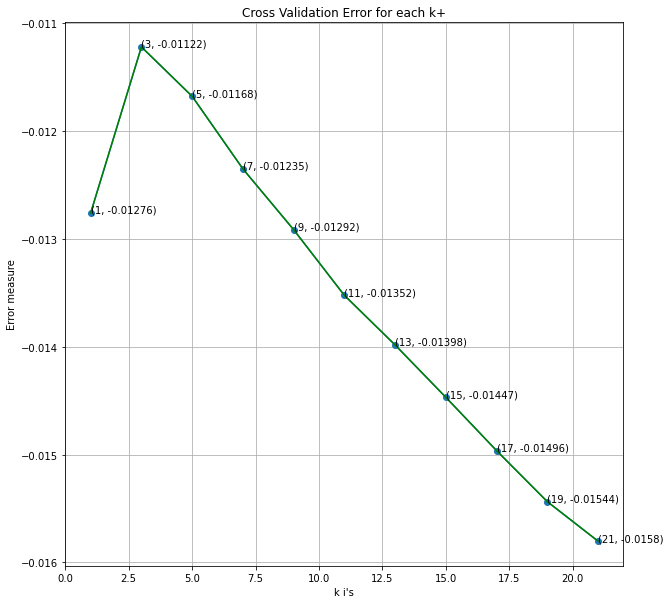

Train MSE Min-Max:: 0.000140844101205738
Train MAE Min-Max:: 0.007625542212182693
Test MSE Min-Max:: 0.00019123174274506173
Test MAE Min-Max:: 0.010291426774992625


In [67]:
regressor = KNeighborsRegressor()
params = [{'n_neighbors': range(1,22,2)}]
reg = GridSearchCV(regressor, params, cv = 10, scoring='neg_mean_absolute_error')
reg.fit(X_train_min_max, y_train)
best_n_neighbors = reg.best_params_['n_neighbors']
print("Best value of n_neighbors during CV::",best_n_neighbors)
print("Best MSE score during CV::",reg.best_score_)


###################################
k = [i['n_neighbors'] for i in reg.cv_results_['params']]
print(k)
cv_error = [i for i in reg.cv_results_['mean_test_score']]
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(k, cv_error,marker='o')
ax.plot(k, cv_error,c='g')
for i, txt in enumerate(np.round(cv_error,5)):
    ax.annotate((k[i],np.round(txt,5)), (k[i],(cv_error[i])))
plt.grid()
plt.title("Cross Validation Error for each k+")
plt.xlabel("k i's")
plt.ylabel("Error measure")
plt.show()
###################################


reg = KNeighborsRegressor(n_neighbors=best_n_neighbors)
reg.fit(X_train_min_max,y_train)

y_train_min_max_hat = reg.predict(X_train_min_max)
mse_train_min_max = mean_squared_error(y_train,y_train_min_max_hat)
mae_train_min_max = mean_absolute_error(y_train,y_train_min_max_hat)
print("Train MSE Min-Max::",mse_train_min_max)
print("Train MAE Min-Max::",mae_train_min_max)

y_test_min_max_hat = reg.predict(X_test_min_max)
mse_test_min_max = mean_squared_error(y_test,y_test_min_max_hat)
mae_test_min_max = mean_absolute_error(y_test,y_test_min_max_hat)
print("Test MSE Min-Max::",mse_test_min_max)
print("Test MAE Min-Max::",mae_test_min_max)

<h3>4.1 Plotting a curve between actual and predicted Test datapoints</h3>

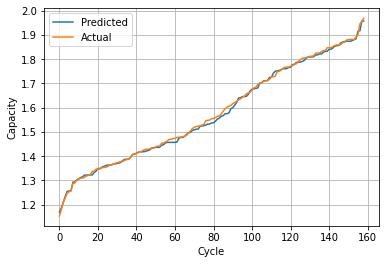

In [55]:
y_test_min_max_hat_sort = np.sort(y_test_min_max_hat)
y_test_sort = np.sort(y_test)
plt.grid()
plt.plot(y_test_min_max_hat_sort,label='Predicted')
plt.plot(y_test_sort,label='Actual')
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.legend()
plt.show()

<h3>4.2 Checking for Heteroskedacity</h3>

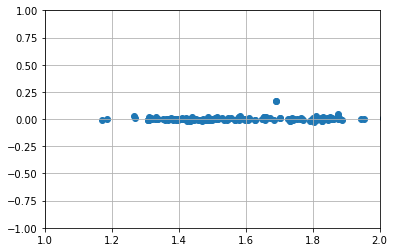

In [251]:
y_pred = y_test_min_max_hat
y_true = y_test.values
y_diff = y_true - y_pred
plt.grid()
plt.xlim(1, 2)
plt.ylim(-1, 1)
plt.scatter(y_pred,y_diff)
plt.show()
#No heterosckedacity

<h3>4.3 Distribution of error</h3>

Mean of error:: 0.0005550847501972955
Std of error:: 0.008109927118907715


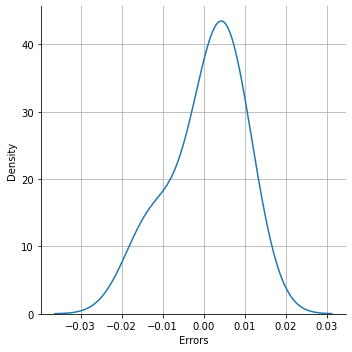

In [336]:
print("Mean of error::",np.mean(y_diff))
print("Std of error::",np.std(y_diff))
df_error = pd.DataFrame(y_diff)
df_error.rename(columns={0:"Errors"},inplace=True) 
sns.displot(df_error, x='Errors', kind="kde", bw_adjust=2)
plt.grid()
plt.show()

<h3>4.4 Most important feature</h3>

In [338]:
sfs_knn = sfs(reg, n_features_to_select=1, direction='forward', scoring='neg_mean_squared_error')
sfs_knn = sfs_knn.fit(X_train_min_max, y_train)
feature_indices = sfs_knn.get_support()
print("The most importanct feature is::",df.columns.values[feature_indices][0])

The most importanct feature is:: Min_Volt_Time_Discharge


<h3>4.5 Observations from the model performance</h3>

1. From the model prediction the MAE is less than that of the base model, hence the model is sensible. 
2. From the actual and predicted Test datapoints curve, we see that the predicted values almost follows the actual values but      with slight variation in the middle portion of the curve
3. From the Heteroskedasticity plot, the curve is not funnelling out hence there is no Heteroskedasticity in the model. Hence      the population in the regression problem does not contain unequal variance and thus the prediction of the model can be          accepted. 
4. The Error is centred about 0.0005 with a standard deviation of 0.008 
5. The most important feature given by the model is Min_Volt_Time_Discharge which is the duration after which the discharge voltage reached 2.7 volts. It is seen that the time required to reach a voltage of 2.7 volts during discharge decreases as the number of discharge cycles increases and this characteristic is in consonance with the bahaiviour of the capacity of the battery.

<h2>5. DecisionTree Regression</h2>

In [96]:
regressor = DecisionTreeRegressor()
params = [{'min_samples_split': range(10,15),'min_samples_leaf': range(9,10)}]
reg = GridSearchCV(regressor, params, cv = 10, scoring='neg_mean_absolute_error')
reg.fit(X_train_min_max, y_train)
best_min_samples_split = reg.best_params_['min_samples_split']
best_min_samples_leaf = reg.best_params_['min_samples_leaf']
print("Best value of min_samples_split during CV::",best_min_samples_split)
print("Best value of min_samples_leaf during CV::",best_min_samples_leaf)
print("Best MSE score during CV::",reg.best_score_)



reg = DecisionTreeRegressor(min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf)
reg.fit(X_train_min_max,y_train)

y_train_min_max_hat = reg.predict(X_train_min_max)
mse_train_min_max = mean_squared_error(y_train,y_train_min_max_hat)
mae_train_min_max = mean_absolute_error(y_train,y_train_min_max_hat)
print("Train MSE Min-Max::",mse_train_min_max)
print("Train MAE Min-Max::",mae_train_min_max)

y_test_min_max_hat = reg.predict(X_test_min_max)
mse_test_min_max = mean_squared_error(y_test,y_test_min_max_hat)
mae_test_min_max = mean_absolute_error(y_test,y_test_min_max_hat)
print("Test MSE Min-Max::",mse_test_min_max)
print("Test MAE Min-Max::",mae_test_min_max)

Best value of min_samples_split during CV:: 14
Best value of min_samples_leaf during CV:: 9
Best MSE score during CV:: -0.011999331884802539
Train MSE Min-Max:: 0.00014672714387135012
Train MAE Min-Max:: 0.00861551620623712
Test MSE Min-Max:: 0.00013332417370314593
Test MAE Min-Max:: 0.009007981343543348


<h3>5.1 Plotting a curve between actual and predicted Test datapoints</h3>

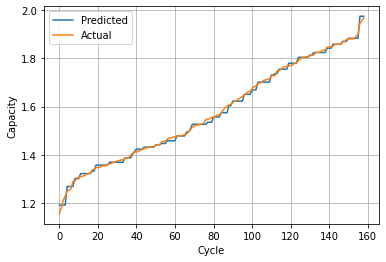

In [97]:
y_test_min_max_hat_sort = np.sort(y_test_min_max_hat)
y_test_sort = np.sort(y_test)
plt.grid()
plt.plot(y_test_min_max_hat_sort,label='Predicted')
plt.plot(y_test_sort,label='Actual')
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.legend()
plt.show()

<h3>5.2 Checking for Heteroskedacity</h3>

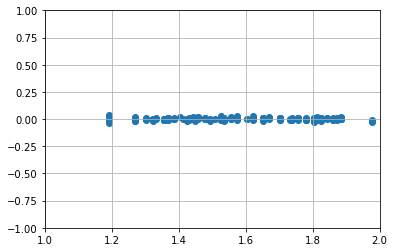

In [98]:
y_pred = y_test_min_max_hat
y_true = y_test.values
y_diff = y_true - y_pred
plt.grid()
plt.xlim(1, 2)
plt.ylim(-1, 1)
plt.scatter(y_pred,y_diff)
plt.show()
#No heterosckedacity

<h3>5.3 Distribution of error</h3>

Mean of error:: 0.0013847201968745176
Std of error:: 0.01146327717886616


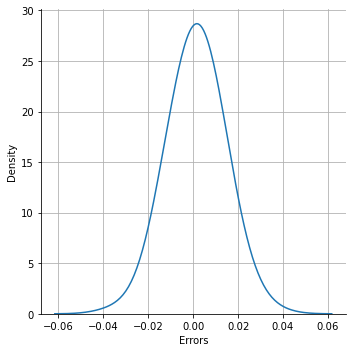

In [106]:

print("Mean of error::",np.mean(y_diff))
print("Std of error::",np.std(y_diff))
df_ = pd.DataFrame(y_diff)
df_.rename(columns={0:"Errors"},inplace=True) 
sns.displot(df_, x='Errors', kind="kde", bw_adjust=2)
plt.grid()
plt.show()

<h3>5.4 Most important feature</h3>

In [115]:
sfs_dt = sfs(reg, n_features_to_select=1, direction='forward', scoring='neg_mean_squared_error')
sfs_dt = sfs_dt.fit(X_train_min_max, y_train)
feature_indices = sfs_dt.get_support()
print("The most importanct feature is::",df.columns.values[0])

The most importanct feature is:: CC_Duration_Charge


<h3>5.5 Observations from the model performance</h3>

1. From the model prediction the MAE is less than that of the base model, hence the model is sensible. 
2. From the actual and predicted Test datapoints curve, we see that the predicted values almost follows the actual values but      with slight variation in some pockets.
3. From the Heteroskedasticity plot, the curve is not funnelling out hence there is no Heteroskedasticity in the model. Hence      the population in the regression problem does not contain unequal variance and thus the prediction of the model can be          accepted. 
4. The Error is centred about 0.0014 with a standard deviation of 0.013
5. The most important feature given by the model is CC_Duration_Charge which is the duration for current was constant while charging. It is seen that the time for which the current remains constant at 1.5 during charge decreases as the number of charge cycles increases and this characteristic is in consonance with the bahaiviour of the capacity of the battery.

<h2>6. Random Forest</h2>

Best value of n_estimators during CV:: 950
Best MSE score during CV:: -0.008983268445188753


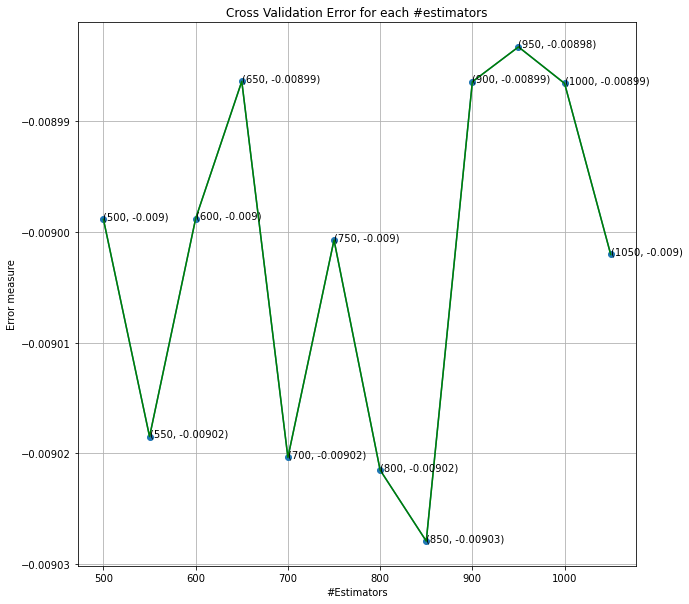

Train MSE Min-Max:: 1.7334312863282963e-05
Train MAE Min-Max:: 0.003283175562606691
Test MSE Min-Max:: 8.501524301117237e-05
Test MAE Min-Max:: 0.006974138388126344


In [116]:
regressor = RandomForestRegressor()
params = [{'n_estimators': range(500,1100,50)}]
reg = GridSearchCV(regressor, params, cv = 10, scoring='neg_mean_absolute_error')
reg.fit(X_train_min_max, y_train)
best_n_estimators = reg.best_params_['n_estimators']
print("Best value of n_estimators during CV::",best_n_estimators)
print("Best MSE score during CV::",reg.best_score_)


###################################
base_learners = [i['n_estimators'] for i in reg.cv_results_['params']]
cv_error = [i for i in reg.cv_results_['mean_test_score']]
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(base_learners, cv_error,marker='o')
ax.plot(base_learners, cv_error,c='g')
for i, txt in enumerate(np.round(cv_error,5)):
    ax.annotate((base_learners[i],np.round(txt,5)), (base_learners[i],(cv_error[i])))
plt.grid()
plt.title("Cross Validation Error for each #estimators")
plt.xlabel("#Estimators")
plt.ylabel("Error measure")
plt.show()
###################################


reg = RandomForestRegressor(n_estimators=best_n_estimators)#,min_samples_split=best_min_samples_split)
reg.fit(X_train_min_max,y_train)

y_train_min_max_hat = reg.predict(X_train_min_max)
mse_train_min_max = mean_squared_error(y_train,y_train_min_max_hat)
mae_train_min_max = mean_absolute_error(y_train,y_train_min_max_hat)
print("Train MSE Min-Max::",mse_train_min_max)
print("Train MAE Min-Max::",mae_train_min_max)

y_test_min_max_hat = reg.predict(X_test_min_max)
mse_test_min_max = mean_squared_error(y_test,y_test_min_max_hat)
mae_test_min_max = mean_absolute_error(y_test,y_test_min_max_hat)
print("Test MSE Min-Max::",mse_test_min_max)
print("Test MAE Min-Max::",mae_test_min_max)

<h3>6.1 Plotting a curve between actual and predicted Test datapoints</h3>

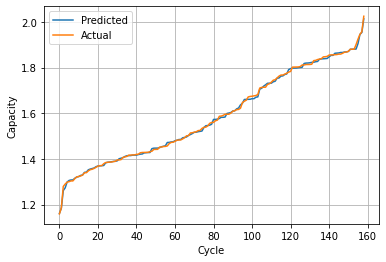

In [196]:
y_test_min_max_hat_sort = np.sort(y_test_min_max_hat)
y_test_sort = np.sort(y_test)
plt.grid()
plt.plot(y_test_min_max_hat_sort,label='Predicted')
plt.plot(y_test_sort,label='Actual')
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.legend()
plt.show()

<h3>6.2 Checking for Heteroskedacity</h3>

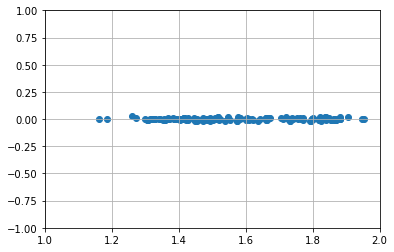

In [197]:
y_pred = y_test_min_max_hat
y_true = y_test.values
y_diff = y_true - y_pred
plt.grid()
plt.xlim(1, 2)
plt.ylim(-1, 1)
plt.scatter(y_pred,y_diff)
plt.show()
#No heterosckedacity

In [ ]:
<h3>6.3 Distribution of error</h3>

Mean of error:: 0.0007463913394432897
Std of error:: 0.009084954195984218


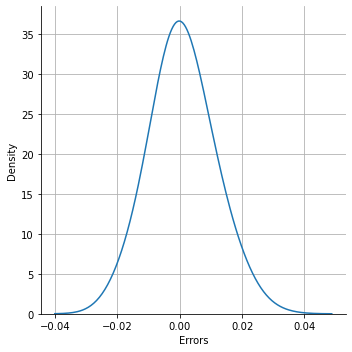

In [198]:
#Distribution of error
print("Mean of error::",np.mean(y_diff))
print("Std of error::",np.std(y_diff))
df_ = pd.DataFrame(y_diff)
df_.rename(columns={0:"Errors"},inplace=True) 
sns.displot(df_, x='Errors', kind="kde", bw_adjust=2)
plt.grid()
plt.show()

<h3>6.4 Most important feature</h3>

In [118]:
sfs_rf = sfs(reg, n_features_to_select=1, direction='forward', scoring='neg_mean_squared_error')
sfs_rf = sfs_dt.fit(X_train_min_max, y_train)
feature_indices = sfs_rf.get_support()
print("The most importanct feature is::",df.columns.values[0])

The most importanct feature is:: CC_Duration_Charge


<h3>6.5 Observations from the model performance</h3>

1. From the model prediction the MAE is less than that of the base model, hence the model is sensible. 
2. From the actual and predicted Test datapoints curve, we see that the predicted values almost follows the actual values
3. From the Heteroskedasticity plot, the curve is not funnelling out hence there is no Heteroskedasticity in the model. Hence      the population in the regression problem does not contain unequal variance and thus the prediction of the model can be          accepted. 
4. The Error is centred about 0.0007 with a standard deviation of 0.0090
5. The most important feature given by the model is CC_Duration_Charge which is the duration for current was constant while charging. It is seen that the time for which the current remains constant at 1.5 during charge decreases as the number of charge cycles increases and this characteristic is in consonance with the bahaiviour of the capacity of the batter

<h2>7. Gradient Boosted Regressor</h2>

Best value of n_estimators during CV:: 100
Best MSE score during CV:: -0.009228415082265271


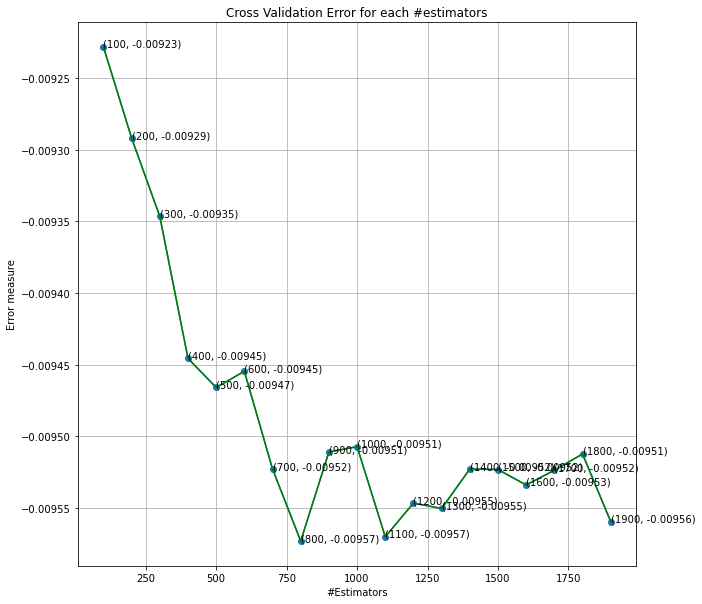

Train MSE Min-Max:: 3.598078760417313e-05
Train MAE Min-Max:: 0.00467614195999737
Test MSE Min-Max:: 8.830588206725152e-05
Test MAE Min-Max:: 0.007442201170200112


In [119]:
regressor = GradientBoostingRegressor()
params = [{'n_estimators': range(100,2000,100)}]
reg = GridSearchCV(regressor, params, cv = 10, scoring='neg_mean_absolute_error')
reg.fit(X_train_min_max, y_train)
best_n_estimators = reg.best_params_['n_estimators']
print("Best value of n_estimators during CV::",best_n_estimators)
print("Best MSE score during CV::",reg.best_score_)


###################################
base_learners = [i['n_estimators'] for i in reg.cv_results_['params']]
cv_error = [i for i in reg.cv_results_['mean_test_score']]
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(base_learners, cv_error,marker='o')
ax.plot(base_learners, cv_error,c='g')
for i, txt in enumerate(np.round(cv_error,5)):
    ax.annotate((base_learners[i],np.round(txt,5)), (base_learners[i],(cv_error[i])))
plt.grid()
plt.title("Cross Validation Error for each #estimators")
plt.xlabel("#Estimators")
plt.ylabel("Error measure")
plt.show()
###################################


reg = GradientBoostingRegressor(n_estimators=best_n_estimators)#,min_samples_split=best_min_samples_split)
reg.fit(X_train_min_max,y_train)

y_train_min_max_hat = reg.predict(X_train_min_max)
mse_train_min_max = mean_squared_error(y_train,y_train_min_max_hat)
mae_train_min_max = mean_absolute_error(y_train,y_train_min_max_hat)
print("Train MSE Min-Max::",mse_train_min_max)
print("Train MAE Min-Max::",mae_train_min_max)

y_test_min_max_hat = reg.predict(X_test_min_max)
mse_test_min_max = mean_squared_error(y_test,y_test_min_max_hat)
mae_test_min_max = mean_absolute_error(y_test,y_test_min_max_hat)
print("Test MSE Min-Max::",mse_test_min_max)
print("Test MAE Min-Max::",mae_test_min_max)

<h3>7.1 Plotting a curve between actual and predicted Test datapoints</h3>

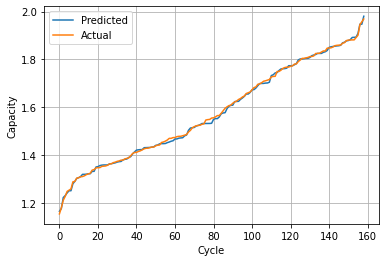

In [120]:
y_test_min_max_hat_sort = np.sort(y_test_min_max_hat)
y_test_sort = np.sort(y_test)
plt.grid()
plt.plot(y_test_min_max_hat_sort,label='Predicted')
plt.plot(y_test_sort,label='Actual')
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.legend()
plt.show()

<h3>7.2 Checking for Heteroskedacity</h3>

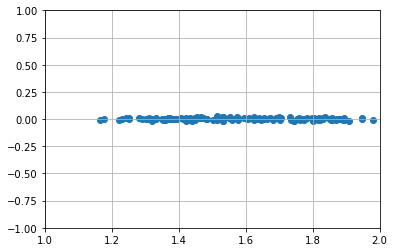

In [121]:
y_pred = y_test_min_max_hat
y_true = y_test.values
y_diff = y_true - y_pred
plt.grid()
plt.xlim(1, 2)
plt.ylim(-1, 1)
plt.scatter(y_pred,y_diff)
plt.show()
#No heterosckedacity

<h3>7.3 Distribution of error</h3>

Mean of error:: 0.0015210764454111412
Std of error:: 0.009273198397234199


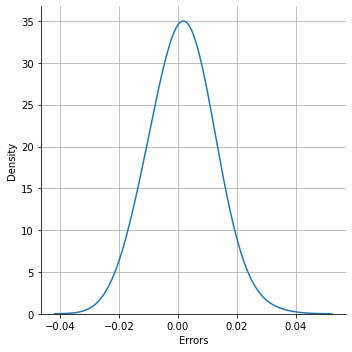

In [126]:
#Distribution of error
print("Mean of error::",np.mean(y_diff))
print("Std of error::",np.std(y_diff))
df_ = pd.DataFrame(y_diff)
df_.rename(columns={0:"Errors"},inplace=True) 
sns.displot(df_, x='Errors', kind="kde", bw_adjust=2)
plt.grid()
plt.show()

<h3>7.4 Most important feature</h3>

In [123]:
sfs_gb = sfs(reg, n_features_to_select=1, direction='forward', scoring='neg_mean_squared_error')
sfs_gb = sfs_dt.fit(X_train_min_max, y_train)
feature_indices = sfs_gb.get_support()
print("The most importanct feature is::",df.columns.values[0])

The most importanct feature is:: CC_Duration_Charge


<h3>7.5 Observations from the model performance</h3>

1. From the model prediction the MAE is less than that of the base model, hence the model is sensible. 
2. From the actual and predicted Test datapoints curve, we see that the predicted values almost follows the actual values
3. From the Heteroskedasticity plot, the curve is not funnelling out hence there is no Heteroskedasticity in the model. Hence      the population in the regression problem does not contain unequal variance and thus the prediction of the model can be          accepted. 
4. The Error is centred about 0.0015 with a standard deviation of 0.0092
5. The most important feature given by the model is CC_Duration_Charge which is the duration for current was constant while charging. It is seen that the time for which the current remains constant at 1.5 during charge decreases as the number of charge cycles increases and this characteristic is in consonance with the bahaiviour of the capacity of the batter

<h2>8. Multi-Layered Perceptron</h2>

In [106]:
from tensorflow.keras.callbacks import ModelCheckpoint
model = Sequential() 
model.add(Dense(64, activation = 'sigmoid',kernel_initializer = 'normal',input_shape = (4,)))  
model.add(Dense(1))
print(model.summary())


optimizer = tf.keras.optimizers.Adam(learning_rate=.001)
model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mean_absolute_error'])

history = model.fit(
   X_train, y_train,    
   epochs = 50, 
   verbose = 1, 
   validation_split = 0.2, 
   callbacks = [EarlyStopping(monitor = 'val_loss', patience = 20)]
)

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_147 (Dense)           (None, 64)                320       
                                                                 
 dense_148 (Dense)           (None, 1)                 65        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
12/12 [==============================] - 0s 11ms/step - loss: 2.4098 - mean_absolute_error: 1.5046 - val_loss: 1.0029 - val_mean_absolute_error: 0.9488
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6097 - mean_absolute_error: 0.7078 - val_loss: 0.1356 - val_mean_absolute_error: 0.3152
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 0.1025 - mean_absolute_error: 0.2578 - val_loss: 

In [107]:
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test MAE:', score[1])

Test loss: 0.014137555845081806
Test MAE: 0.09411442279815674


<h3>8.1 Plotting a curve between actual and predicted Test datapoints</h3>

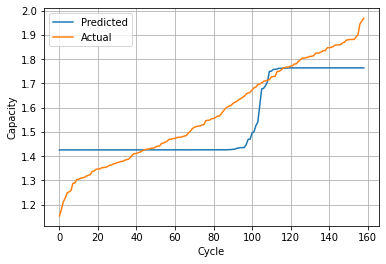

In [108]:
y_test_min_max_hat_sort = np.sort(model.predict(X_test)[:,0])
y_test_sort = np.sort(y_test)
plt.grid()
plt.plot(y_test_min_max_hat_sort,label='Predicted')
plt.plot(y_test_sort,label='Actual')
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.legend()
plt.show()

<h3>8.2 Checking for Heteroskedacity</h3>

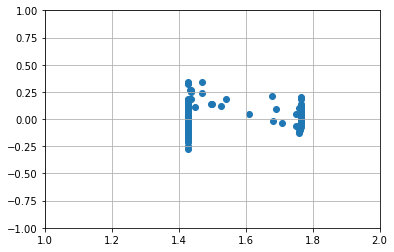

In [110]:
y_pred = model.predict(X_test)[:,0]
y_true = y_test.values
y_diff = y_true - y_pred
plt.grid()
plt.xlim(1, 2)
plt.ylim(-1, 1)
plt.scatter(y_pred,y_diff)
plt.show()

<h3>8.3 Distribution of error</h3>

Mean of error:: 0.034260261560413195
Std of error:: 0.11385867267923522


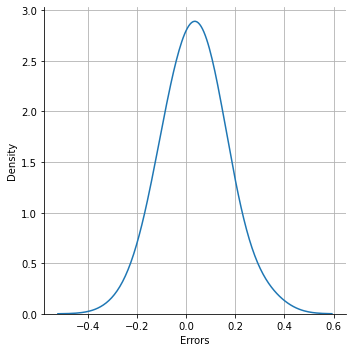

In [111]:
#Distribution of error
print("Mean of error::",np.mean(y_diff))
print("Std of error::",np.std(y_diff))
df_ = pd.DataFrame(y_diff)
df_.rename(columns={0:"Errors"},inplace=True) 
sns.displot(df_, x='Errors', kind="kde", bw_adjust=2)
plt.grid()
plt.show()

Above is the modelling with an MLP with a single hidden layer. Many hyper-parameters were
tried like:

a) Taking multiple hidden layers
b) Taking different number of nuerons in the hidden layer
c) Taking other activation function like ReLu and Tanh
d) Taking other optimizer like RMSprop
e) Taking various learning rates other than 0.001

But none seemed to have given any better result than the current one. And the one that I have got
is just better than the base line mean model with MAE close to 0.1. Hence it can be concluded 
that with the engineered feature DL models which are non-linear in nature are not performing well.

<h2>6 Tabulating your results</h2>

In [113]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Sl No.","Model Name", "MAE","MSE",'Hyperparamter']
x.add_row(['1','Base',0.17816,0.04100,'NA'])
x.add_row(['2','Linear Regression',0.00392,2.76e-05,'NA'])
x.add_row(['3','SVM Regression',0.00651,6.56e-05,'Epsilon = 0.001'])
x.add_row(['4','KNN Regression',0.01029,0.00019,'k = 3'])
x.add_row(['5','DT Regression',0.00993,0.00013,'min_samples_split during CV = 12\nmin_samples_leaf during CV = 9'])
x.add_row(['6','RF Regression',0.00697,8.5e-05,'Base Learners = 950'])
x.add_row(['7','Gradient Boosted Regression',0.00744,8.83e-05,'Base Learners = 1400'])
x.add_row(['8','Multi-Layered Perceptron',0.01413,0.09411,'Learning-Rate = 0.001'])
print(x)

+--------+-----------------------------+---------+----------+----------------------------------+
| Sl No. |          Model Name         |   MAE   |   MSE    |          Hyperparamter           |
+--------+-----------------------------+---------+----------+----------------------------------+
|   1    |             Base            | 0.17816 |  0.041   |                NA                |
|   2    |      Linear Regression      | 0.00392 | 2.76e-05 |                NA                |
|   3    |        SVM Regression       | 0.00651 | 6.56e-05 |         Epsilon = 0.001          |
|   4    |        KNN Regression       | 0.01029 | 0.00019  |              k = 3               |
|   5    |        DT Regression        | 0.00993 | 0.00013  | min_samples_split during CV = 12 |
|        |                             |         |          |  min_samples_leaf during CV = 9  |
|   6    |        RF Regression        | 0.00697 | 8.5e-05  |       Base Learners = 950        |
|   7    | Gradient Boosted Re

Looking at the above table we can see that out of all the model Linear Regression performed the best for this problem. Hence 
we would deploy the model with Linear Regression.

<h2>9. For saving the model</h2>

In [130]:
joblib.dump(minmaxScaler, 'minmaxScaler.pkl')
joblib.dump(l_reg, 'model.pkl')

['model.pkl']

<h2>10. Prediction Function with Logistic Regression</h2>

In [15]:
df_query = pd.read_csv("query.csv")
df_query.drop('Unnamed: 0', axis=1, inplace=True)
df_query.head()

,Current_charge,Time_charge,Temp_charge,Volt_discharge,Time_discharge,Temp_discharge
0,-0.000394,0.000,25.221721,4.188261,0.000,23.938415
1,-3.490491,2.515,25.217162,4.187257,16.719,23.936228
2,1.511330,5.515,25.233430,3.986501,35.688,24.001003
3,1.511381,8.359,25.257200,3.965346,53.766,24.157842
4,1.511733,11.219,25.262397,3.949469,71.844,24.344341


In [16]:
def cc_dur(Current_charge,Time_charge):
    idx = 0
    for j in Current_charge[10:]:
            if (j < 1.45) and idx > 1:
                #since we have left the first 10 samples so to catch up with the actual time sample value
                #we are adding 10 with the index to get the exact time sample value
                time = Time_charge[idx+10]
                break
            idx += 1
    return time

In [17]:
def max_temp_time_charge(Temp_charge,Time_charge):
    #Getting the index when the time is more than 2000
        idx = 0 
        for time in Time_charge:
            if time > 2000:
                break
            idx += 1
        temp_lst = Temp_charge[idx:]

        t_max = np.max(temp_lst)
        idx_t_max = np.where(temp_lst == t_max)[0][0]
        time_t_max = Time_charge[idx_t_max+idx]
        return time_t_max

In [18]:
def max_temp_time_discharge(Temp_discharge,Time_discharge):
    
    temp_lst = Temp_discharge[~np.isnan(Temp_discharge)]
    Time_discharge = Time_discharge[~np.isnan(Time_discharge)]
    t_max = np.max(temp_lst)
    idx_t_max = np.where(temp_lst == t_max)[0][0]
    time_t_max = Time_discharge[idx_t_max]
    return time_t_max

In [19]:
def Min_Volt_Time_Discharge(Volt_discharge,Time_discharge):
    temp_lst = Volt_discharge[~np.isnan(Volt_discharge)]
    Time_discharge = Time_discharge[~np.isnan(Time_discharge)]
    idx = 0
    for ele in temp_lst:
        if ele < 2.7:
            break
        idx += 1
    time_v_min = Time_discharge[idx]
    return time_v_min

In [20]:
def pred(Current_charge,Time_charge,Temp_charge,Volt_discharge,Time_discharge,Temp_discharge):
    """
    Here the query point x_q is a list consisting of the following lists:
    Current_charge,Time_charge,Temp_charge,Volt_discharge,Time_discharge,Temp_discharge
    """
    cc_dur_ = cc_dur(Current_charge,Time_charge)
    max_temp_time_charge_ = max_temp_time_charge(Temp_charge,Time_charge)
    max_temp_time_discharge_ = max_temp_time_discharge(Temp_discharge,Time_discharge)
    Min_Volt_Time_Discharge_ = Min_Volt_Time_Discharge(Volt_discharge,Time_discharge)
    
    #Transforming the input values
    transformed_values = minmaxScaler.transform([[cc_dur_,max_temp_time_charge_,max_temp_time_discharge_,Min_Volt_Time_Discharge_]])
    #The predicted capacity of the battery
    predicted_capacity = l_reg.predict(transformed_values)
    
    return predicted_capacity


In [23]:
Current_charge = df_query['Current_charge'].values
Time_charge = df_query['Time_charge'].values
Temp_charge = df_query['Temp_charge'].values
Volt_discharge = df_query['Volt_discharge'].values
Time_discharge = df_query['Time_discharge'].values
Temp_discharge = df_query['Temp_discharge'].values
predicted_capacity = pred(Current_charge,Time_charge,Temp_charge,Volt_discharge,Time_discharge,Temp_discharge)
print("The predicted Capacity of the battery::",predicted_capacity[0])

The predicted Capacity of the battery:: 1.8126417153066043
